In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [97]:
# Importing the dataset
telcom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [98]:
# previewing the dataset
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [99]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [100]:
# dropping tenure with value 0
telcom[telcom['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [101]:
# Dropping missing values
telcom = telcom[telcom['tenure'] != 0]

# Show the DataFrame after dropping rows
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [102]:
# Converting Churn column to numeric
telcom['Churn'] = telcom['Churn'].map({'Yes': 1, 'No': 0})

In [103]:
# Checking for duplicates
telcom = telcom.drop_duplicates(subset='customerID')

In [104]:
# Checking descriptive features of categorical variables
cat_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for var in cat_vars:
    print(telcom[var].value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                

In [131]:
# Checking descriptive features of continuous variables
print(telcom[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


## Exploratory Data Analysis(EDA)

(0.0, 8684.8)

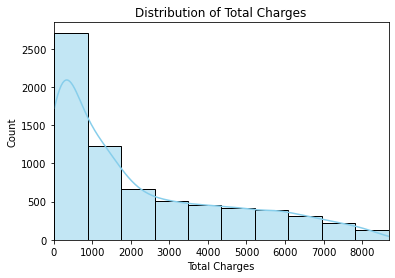

In [106]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'], errors='coerce')

# Remove rows with NaN or zero in 'TotalCharges'
telcom_filtered = telcom[telcom['TotalCharges'] > 0]

# Plot distribution of Total Charges
sns.histplot(telcom_filtered['TotalCharges'], bins=10, kde=True, color='skyblue', edgecolor='black', stat='count')

# Add labels and title
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Distribution of Total Charges')
plt.xlim(0, telcom_filtered['TotalCharges'].max())

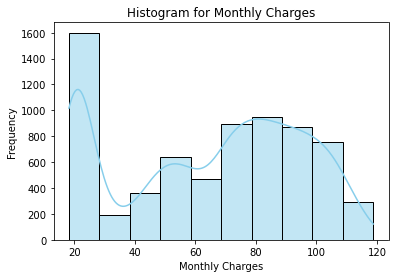

In [107]:
# MonthlyCharges Histogram with KDE
sns.histplot(telcom['MonthlyCharges'], bins=10, kde=True, color='skyblue')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Histogram for Monthly Charges')
plt.show()

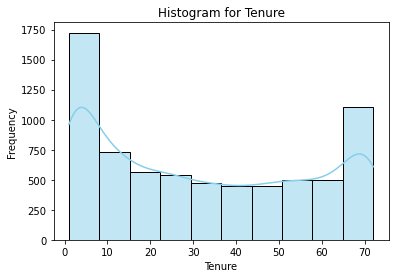

In [108]:
# Tenure Histogram with KDE
sns.histplot(telcom['tenure'], bins=10, kde=True, color='skyblue')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram for Tenure')
plt.show()

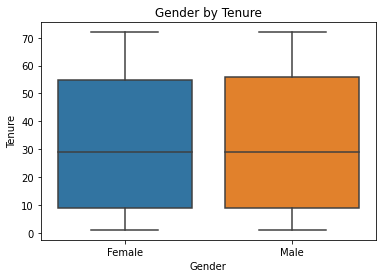

In [109]:
# Create boxplot
sns.boxplot(x='gender', y='tenure', data=telcom)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Tenure')
plt.title('Gender by Tenure')

# Show plot
plt.show()

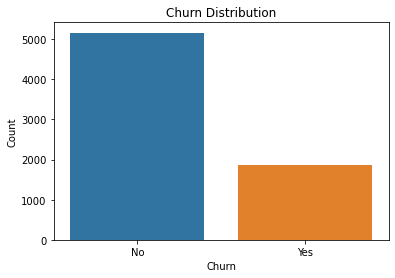

In [110]:
# Churn Variable Bar chart
# Replace values in 'Churn' column
telcom['Churn'] = telcom['Churn'].replace({1: 'Yes', 0: 'No'})

# Create bar chart for Churn
sns.countplot(x='Churn', data=telcom)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')

# Show plot
plt.show()

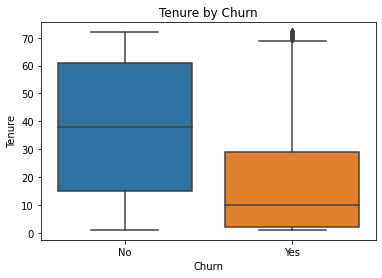

In [111]:
# Replace values in 'Churn' column
telcom['Churn'] = telcom['Churn'].replace({1: 'Yes', 0: 'No'})
# Create box plot for tenure by churn
sns.boxplot(x='Churn', y='tenure', data=telcom)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure by Churn')

# Show plot
plt.show()

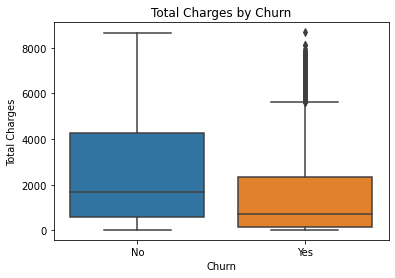

In [112]:
telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'], errors='coerce')

# Create box plot for TotalCharges by Churn
sns.boxplot(x='Churn', y='TotalCharges', data=telcom)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Total Charges by Churn')

# Show plot
plt.show()

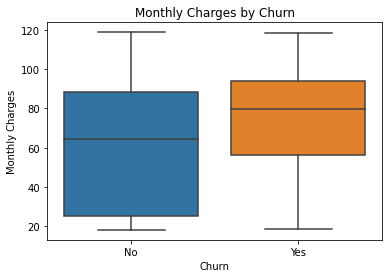

In [113]:
# Convert 'MonthlyCharges' column to numeric
telcom['MonthlyCharges'] = pd.to_numeric(telcom['MonthlyCharges'], errors='coerce')

# Create box plot for MonthlyCharges by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=telcom)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn')

# Show plot
plt.show()

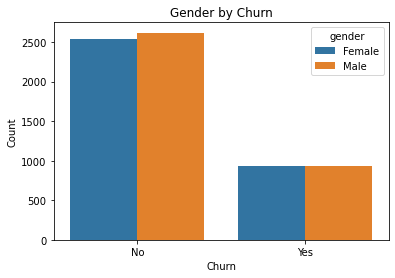

In [114]:
# Create bar chart for Churn by gender
sns.countplot(x='Churn', hue='gender', data=telcom)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Gender by Churn')

# Show plot
plt.show()

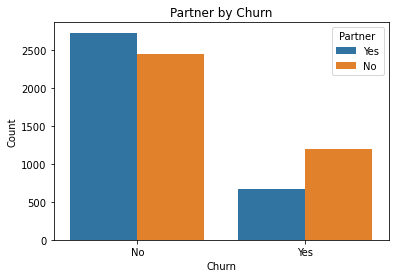

In [115]:
# Create bar chart for Partner by Churn
sns.countplot(x='Churn', hue='Partner', data=telcom)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Partner by Churn')

# Show plot
plt.show()


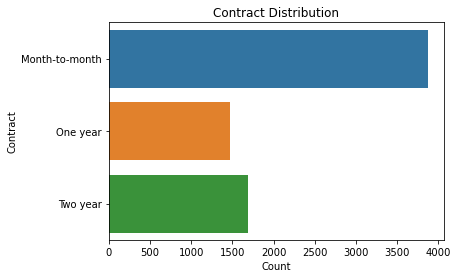

In [116]:
# Create bar chart for Contract distribution
sns.countplot(y='Contract', data=telcom)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Contract')
plt.title('Contract Distribution')

# Show plot
plt.show()

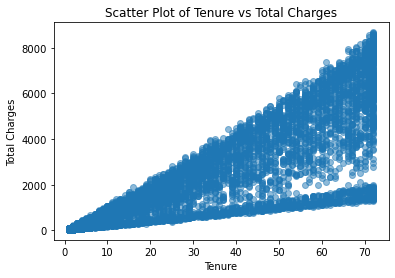

In [117]:
plt.scatter(telcom['tenure'], telcom['TotalCharges'], alpha=0.5)

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Scatter Plot of Tenure vs Total Charges')

# Show plot
plt.show()

In [118]:
# Correlation
corr_matrix = telcom[['tenure', 'TotalCharges']].corr()
print(corr_matrix)

               tenure  TotalCharges
tenure        1.00000       0.82588
TotalCharges  0.82588       1.00000


In [119]:
# Filter dataset for customers who left
left_customers = telcom[telcom['Churn'] == 'Yes']

# Calculate maximum and minimum tenures of customers who left
max_tenure_left = left_customers['tenure'].max()
min_tenure_left = left_customers['tenure'].min()

print("Maximum tenure of customers who left:", max_tenure_left)
print("Minimum tenure of customers who left:", min_tenure_left)

Maximum tenure of customers who left: 72
Minimum tenure of customers who left: 1


In [120]:
# Filter dataset for customers who were retained
retained_customers = telcom[telcom['Churn'] == 'No']

# Calculate maximum and minimum tenures of customers who were retained
max_tenure_retained = retained_customers['tenure'].max()
min_tenure_retained = retained_customers['tenure'].min()

print("Maximum tenure of customers who were retained:", max_tenure_retained)
print("Minimum tenure of customers who were retained:", min_tenure_retained)

Maximum tenure of customers who were retained: 72
Minimum tenure of customers who were retained: 1


In [121]:
# Create a copy of the telcom DataFrame
telcom_copy = telcom.copy()

# Drop the specified columns from the copied DataFrame
telcom_copy = telcom_copy.drop(columns=['customerID', 'MonthlyCharges', 'tenure', 'TotalCharges'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string categorical variables to numeric labels in the copied DataFrame
for column in telcom_copy.select_dtypes(include=['object']).columns:
    telcom_copy[column] = label_encoder.fit_transform(telcom_copy[column])

# Define features and target variable
X = telcom_copy.drop(columns=['Churn'])
y = telcom_copy['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Combine feature names and importances
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importances
print("\nFeature Importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

Accuracy: 0.7469793887704336

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1033
           1       0.53      0.47      0.49       374

    accuracy                           0.75      1407
   macro avg       0.67      0.66      0.66      1407
weighted avg       0.74      0.75      0.74      1407


Feature Importances:
Contract: 0.1364742590166991
PaymentMethod: 0.12245938011511742
OnlineSecurity: 0.08010037968937239
TechSupport: 0.07171008916500292
gender: 0.06403658663023827
MultipleLines: 0.06049522921209755
Partner: 0.0559178946381258
DeviceProtection: 0.055690915960378735
OnlineBackup: 0.05341743491870504
InternetService: 0.05237037644685038
StreamingMovies: 0.04971619515058809
StreamingTV: 0.04962829096829165
PaperlessBilling: 0.049478230595582026
SeniorCitizen: 0.04473725664640472
Dependents: 0.041120260630224344
PhoneService: 0.012647220216321657


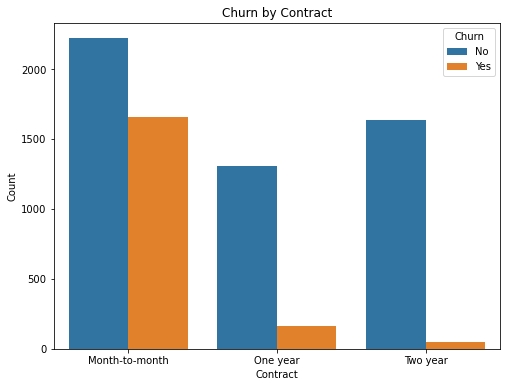

In [122]:
# Plot churn by contract
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=telcom)

# Add labels and title
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Churn by Contract')

# Show plot
plt.show()

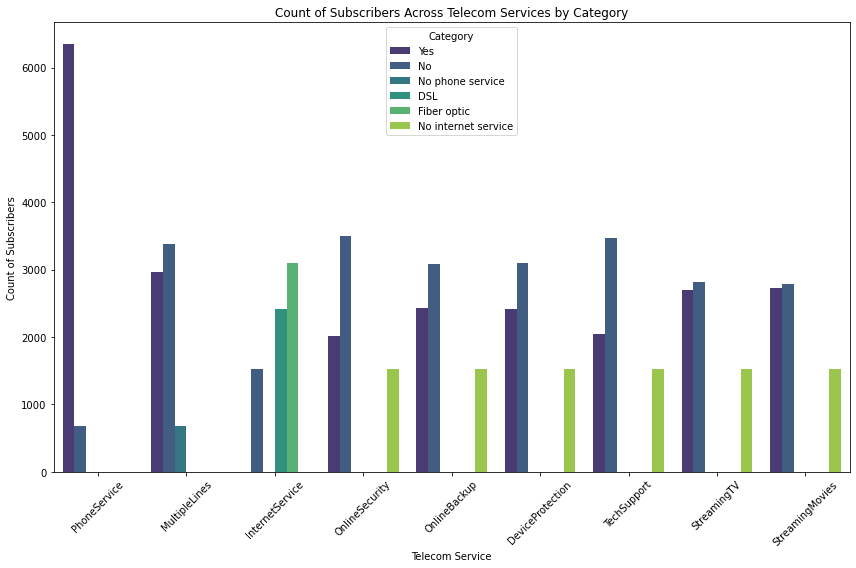

In [123]:
# Define the list of telecom services and their categories
telecom_services = {
    'PhoneService': ['Yes', 'No'],
    'MultipleLines': ['No phone service', 'No', 'Yes'],
    'InternetService': ['DSL', 'Fiber optic', 'No'],
    'OnlineSecurity': ['No internet service', 'No', 'Yes'],
    'OnlineBackup': ['No internet service', 'No', 'Yes'],
    'DeviceProtection': ['No internet service', 'No', 'Yes'],
    'TechSupport': ['No internet service', 'No', 'Yes'],
    'StreamingTV': ['No internet service', 'No', 'Yes'],
    'StreamingMovies': ['No internet service', 'No', 'Yes']
}

# Initialize an empty DataFrame to store counts
service_counts = {'Service': [], 'Category': [], 'Count': []}

# Calculate counts for each telecom service and category
for service, categories in telecom_services.items():
    for category in categories:
        count = (telcom[service] == category).sum()
        service_counts['Service'].append(service)
        service_counts['Category'].append(category)
        service_counts['Count'].append(count)

# Convert the dictionary to a DataFrame
service_counts_df = pd.DataFrame(service_counts)

# Plot the count of subscribers across telecom services and categories
plt.figure(figsize=(12, 8))
sns.barplot(x='Service', y='Count', hue='Category', data=service_counts_df, palette='viridis')
plt.xlabel('Telecom Service')
plt.ylabel('Count of Subscribers')
plt.title('Count of Subscribers Across Telecom Services by Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend(title='Category')
plt.show()

In [124]:
# Calculate count and mean of total charges for each contract type
income_stats_by_contract = telcom.groupby('Contract')['TotalCharges'].agg(['count', 'sum', 'mean'])

# Print the count, mean, and total income from each contract type
print("Income from Contract:")
print(income_stats_by_contract)

Income from Contract:
                count        sum         mean
Contract                                     
Month-to-month   3875  5305861.5  1369.254581
One year         1472  4467053.5  3034.683084
Two year         1685  6283253.7  3728.933947


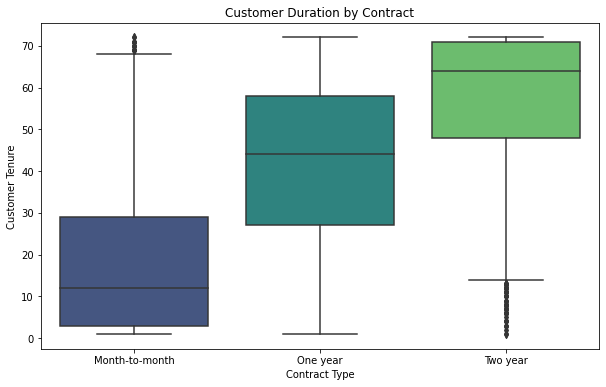

In [125]:
# Create boxplot for customer duration by contract
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', data=telcom, palette='viridis')

# Add labels and title
plt.xlabel('Contract Type')
plt.ylabel('Customer Tenure')
plt.title('Customer Duration by Contract')

# Show plot
plt.show()

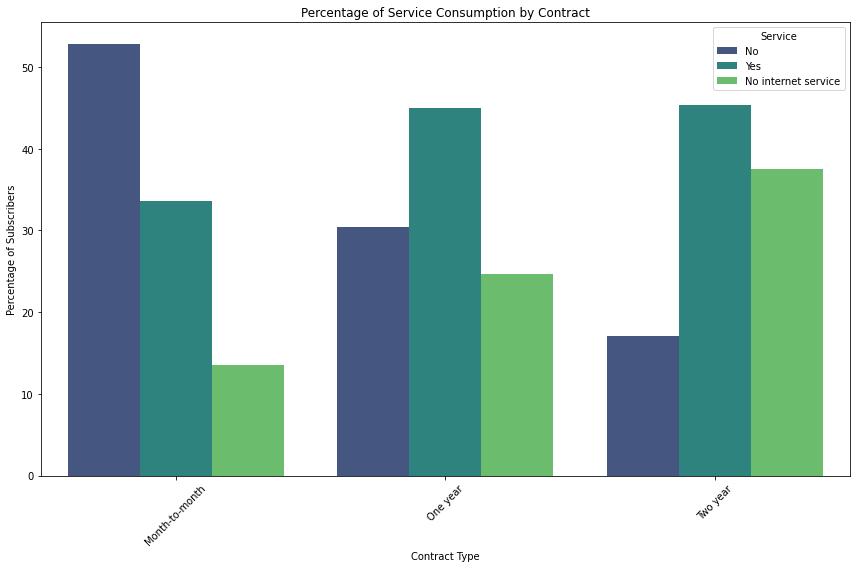

In [126]:
# Define the list of telecom services
telecom_services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Initialize an empty list to store DataFrames
dfs = []

# Calculate percentages for each telecom service and contract
for service in telecom_services:
    # Calculate percentage of subscribers for each service and contract type
    percentages = telcom.groupby('Contract')[service].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    dfs.append(percentages)

# Concatenate the DataFrames
service_percentages = pd.concat(dfs)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Contract', y='Percentage', hue=service, data=service_percentages, palette='viridis', ci=None)

# Adding labels and title
plt.xlabel('Contract Type')
plt.ylabel('Percentage of Subscribers')
plt.title('Percentage of Service Consumption by Contract')

# Show plot
plt.legend(title='Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [127]:
# Define the list of telecom services
telecom_services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Initialize a dictionary to store crosstabs
crosstabs = {}

# Calculate the crosstab for each service
for service in telecom_services:
    crosstab = pd.crosstab(index=telcom['Contract'], columns=telcom[service], normalize='index') * 100
    crosstab.columns = [f'{service}_{col}' for col in crosstab.columns]
    crosstabs[service] = crosstab

# Combine all crosstabs into a single DataFrame
combined_crosstab = pd.concat(crosstabs.values(), axis=1)

# Print the combined crosstab
print("Percentage of Service Consumption by Contract:")
combined_crosstab

Percentage of Service Consumption by Contract:


,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
Contract,,,,,,,,,,,,,,,,,,,,,
Month-to-month,9.703226,90.296774,52.051613,9.703226,38.245161,31.561290,54.916129,13.522581,67.896774,13.522581,...,24.696774,69.161290,13.522581,17.316129,52.980645,13.522581,33.496774,52.825806,13.522581,33.651613
One year,9.850543,90.149457,48.301630,9.850543,41.847826,38.722826,36.616848,24.660326,37.839674,24.660326,...,43.885870,37.839674,24.660326,37.500000,31.046196,24.660326,44.293478,30.366848,24.660326,44.972826
Two year,9.436202,90.563798,38.991098,9.436202,51.572700,36.973294,25.459941,37.566766,18.338279,37.566766,...,48.367953,13.946588,37.566766,48.486647,17.744807,37.566766,44.688427,17.032641,37.566766,45.400593


In [132]:
# Make a copy of the original dataset
telcom_copy1 = telcom.copy()

# Remove the customerID column
telcom_copy1 = telcom_copy1.drop(columns=['customerID'])

# Perform label encoding for all categorical variables
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = telcom_copy1.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for column in categorical_columns:
    telcom_copy1[column] = label_encoder.fit_transform(telcom_copy1[column])

# Compute the correlation matrix
correlation_matrix = telcom_copy1.corr()

# Print the correlation matrix
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


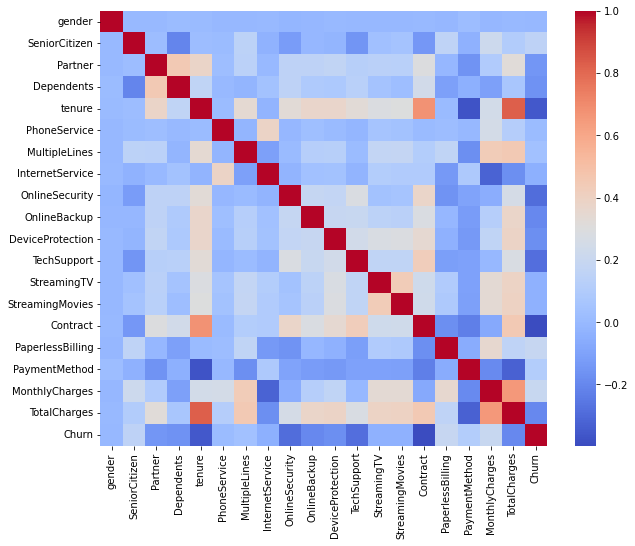

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Show the plot
plt.show()

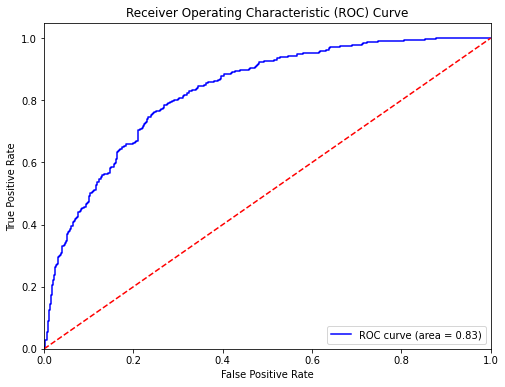

In [129]:
# Define features and target variable
X = telcom_copy1.drop(columns=['Churn'])
y = telcom_copy1['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [135]:
# Define features and target variable
X = telcom_copy1.drop(columns=['Churn'])
y = telcom_copy1['Churn']

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X, y)

# Predict probabilities for each customer
telcom_copy['ProbabilityChurn'] = log_reg.predict_proba(X)[:, 1] * 100

# Display only customerID, Churn, and ProbabilityChurn
telcom_result = telcom[['customerID', 'Churn']].copy()
telcom_result['PercentageChurn'] = telcom_copy['ProbabilityChurn']
telcom_result.head(20)

,customerID,Churn,PercentageChurn
0,7590-VHVEG,No,58.983889
1,5575-GNVDE,No,4.924343
2,3668-QPYBK,Yes,36.880470
3,7795-CFOCW,No,2.047912
4,9237-HQITU,Yes,67.046083
5,9305-CDSKC,Yes,75.279197
6,1452-KIOVK,No,50.910282
7,6713-OKOMC,No,31.331890
8,7892-POOKP,Yes,55.922155
9,6388-TABGU,No,1.099870
